In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def objective(x, y):
    return (x - .1) ** 2 + (y - .3) ** 2 + np.sin((x + .5) * 2) * np.sin(y * 3) + sigmoid(x * 4)

def objective(x, y):
    return (1 - x) ** 2 + 10 * (y - x ** 2) ** 2

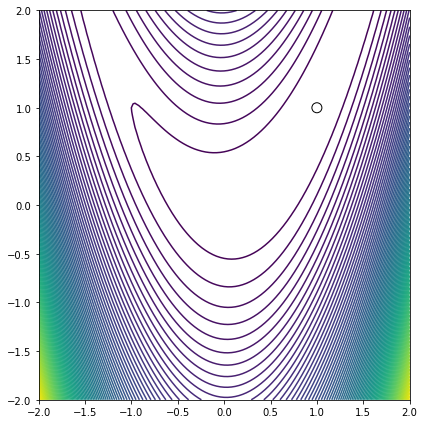

In [3]:
fig, ax = plt.subplots(figsize=(6, 6))
grid_poinst = np.linspace(-2, 2, 101)
xx, yy = np.meshgrid(grid_poinst, grid_poinst)
z = objective(xx, yy)
ax.contour(xx, yy, z, levels=100)
ax.scatter(1, 1, s=100, edgecolor='black', facecolors='none')
fig.tight_layout()
fig.savefig('objective.png')

In [4]:
init_point = np.random.uniform(-.1, .1, 2) - np.array([1.5, 1.5])

alpha = 1.
gamma = 2.
rho = .5
sigma = .5
scaling_factor = 1.

eval_points = np.vstack([init_point + np.eye(2) * scaling_factor, init_point])
best_points = [init_point]

for i in range(100):
    # 目的関数で評価して並び替え
    objective_values_by_point = objective(eval_points[:, 0], eval_points[:, 1])
    orders = np.argsort(objective_values_by_point)
    f_values = objective_values_by_point[orders]
    eval_points = eval_points[orders]

    # 最悪点以外で重心を計算
    centroid = np.mean(eval_points[:-1], axis=0)
    p_worst = eval_points[-1]

    # 反射点 (最悪点から重心の対象な点) を計算 + そのときの目的関数を評価
    p_reflect = centroid + alpha * (centroid - p_worst)
    f_ref = objective(*p_reflect)

    f_best = f_values[0]
    f_second_worse = f_values[-2]
    f_worst = f_values[-1]

    # 反射点がそこそこ良い場合 (second worse よりは良い) → 最悪点を反射点で置き換え
    if f_best <= f_ref < f_second_worse:
        eval_points[-1] = p_reflect

    # 反射点が一番良い場合
    if f_ref < f_best:
        # もうちょっと良い点がないか探りに行くイメージ (拡大点)
        # 最悪点が一番悪い → 反射点の方にもっと移動するイメージ (反射点 + centroid - p_worst [i.e. 最悪点からみた重心方向])
        p_expand = centroid + gamma * (centroid - p_worst)
        f_expand = objective(*p_expand)

        # 拡大点が良かったら採用. だめだったら反射点で妥協
        if f_expand < f_ref:
            eval_points[-1] = p_expand
        else:
            eval_points[-1] = p_reflect

    # 反射点が二番目に悪い点より良くない時
    if f_second_worse < f_ref:
        # 重心と最悪点の間を計算 (大体すべての点のまんなかあたりに対応する)
        p_cont = centroid + rho * (p_worst - centroid)
        f_cont = objective(*p_cont)

        # 縮小点が最悪よりは良い時
        # 重心方向への移動は良いと判断して最悪点を置き換え
        if f_cont < f_worst:
            eval_points[-1] = p_cont
        else:
            # そうでない時最良点めがけて縮小させる (最良点との内点に移動して三角形ちっちゃくするイメージ)
            shrink_points =  eval_points[0] + sigma * (eval_points - eval_points[0])
            eval_points[1:] = shrink_points[1:]
            
    best_points = np.vstack([best_points, eval_points[0]])

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(*best_points.T, 'o--', c='black')
cs = ax.contour(xx, yy, z, levels=20)
ax.clabel(cs)
ax.set_title(f'Nelder Mead Method (Scale {scaling_factor})')
ax.set_xlim(ax.set_ylim(-2, 2))
fig.tight_layout()
fig.savefig(f'result_scale={scaling_factor}.png', dpi=120)